In [105]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# weightVar = 1.3**2

# dataVar = 2.5**2
# dataMean = 1

n_hidden = 128.0
n_dim = 3.0

# biasVar = 0

n_iterations = 10
qStart = 0.0

def integrand(z, prev_q):
    return np.tanh(np.sqrt(prev_q) * z)**2 * 1.0/np.sqrt(2.0 * np.pi) * np.exp(-(z**2)/2.0)

def test(z, a):
    return a*z**2

# nextq = weightVar * n_hidden * quad(integrad, -np.inf, np.inf, args=(qStart)) 
# + weightVar * n_dim * (dataVar + dataMean**2) + biasVar
def simulate(weightVar, dataVar, dataMean, biasVar):
    dynamics = np.zeros(n_iterations)
    for i in range(n_iterations):
        if i == 0:
            dynamics[i] = qStart
        else:
            dynamics[i] = weightVar * quad(integrand, -np.inf, np.inf, args=(dynamics[i-1]))[0] \
            + weightVar * (n_dim/n_hidden) * (dataVar + dataMean**2) + biasVar
    return dynamics

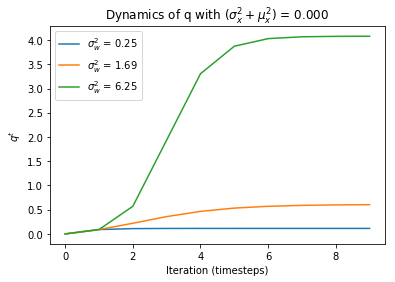

In [112]:
weightStd = [0.5, 1.3, 2.5]
weightVar = [i**2 for i in weightStd]
biasVar = 0.3**2
# dataVar = [0, 0.5, 1.5, 2.5]
dataVar = 0
dataMean = 0
plt.figure(1)
for el in weightVar:
    output = simulate(el, dataVar, dataMean, biasVar)
    plt.plot(output, label=r'$\sigma_w^2$ = %.2f' % el)
    plt.xlabel("Iteration (timesteps)")
    plt.ylabel(r'$q^t$')
    plt.title(r'Dynamics of q with $(\sigma_x^2 + \mu_x^2)$ = %.3f' % (dataVar + dataMean**2))
plt.legend()
plt.show()

In [108]:
biasVar

0.09